In [1]:
from numpy import *
from scipy.sparse import *
from sparsesvd import sparsesvd as svd
import matplotlib.pyplot as plt

In [2]:
# grazie Facchini
def filterTarget(m):
    PLIDs = load("fucking_ordered_playlist.npy")
    TIDs = load("fucking_ordered_tracks.npy")
    target_playlists=genfromtxt("target_playlists.csv",skip_header=1)
    target_tracks=genfromtxt("target_tracks.csv", skip_header=1)
    k = m[isin(PLIDs, target_playlists)]
    k = k[:, isin(TIDs, target_tracks)]
    return k

def filterPLrow(m):
    PLIDs = load("fucking_ordered_playlist.npy")
    target_playlists=genfromtxt("target_playlists.csv",skip_header=1)
    k = m[isin(PLIDs, target_playlists)]
    return k 

def filterTcol(m):
    TIDs = load("fucking_ordered_tracks.npy")
    target_tracks=genfromtxt("target_tracks.csv", skip_header=1)
    k = m[:, isin(TIDs, target_tracks)]
    return k

In [3]:
URM=load_npz("all_playlist_with_tracks_URM.npz")

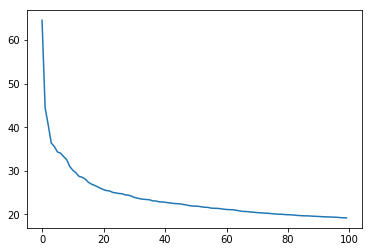

In [4]:
ut100, s100, vt100 = svd(URM,100)
plt.plot(list(s100))
plt.show()

In [5]:
ut100.shape

(100, 45649)

In [6]:
vt100.shape

(100, 100000)

In [7]:
S=diags(s100)
S.shape

(100, 100)

In [8]:
U=lil_matrix(ut100).T
U=filterPLrow(U)
U

<10000x100 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in LInked List format>

In [9]:
VT=lil_matrix(vt100)
VT=filterTcol(VT)
VT

<100x32195 sparse matrix of type '<class 'numpy.float64'>'
	with 3219400 stored elements in LInked List format>

In [10]:
A=U*S.power(1/2)
A

<10000x100 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

In [11]:
B=S.power(1/2)*VT
B

<100x32195 sparse matrix of type '<class 'numpy.float64'>'
	with 3219400 stored elements in Compressed Sparse Row format>

In [12]:
RR=A*B
RR

<10000x32195 sparse matrix of type '<class 'numpy.float64'>'
	with 321940000 stored elements in Compressed Sparse Row format>

In [13]:
URM_target=filterTarget(URM)
URM_target

<10000x32195 sparse matrix of type '<class 'numpy.int32'>'
	with 198708 stored elements in Compressed Sparse Column format>

In [14]:
RR=RR-URM_target

MemoryError: 